In [20]:
import pandas as pd
import re
import requests
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

Download the dataset from here, and read the agaricus-lepiota.data and agaricus-lepiota.names files into a DataFrame
https://archive.ics.uci.edu/dataset/73/mushroom

We need to fetch the data either from the UCI repository, or from a GitHub repository. I have chosen to fetch it from my GitHub repository.

In [21]:
#URL for datasets fetched from my GitHub repository
data_url = "https://raw.githubusercontent.com/hyaneva/IS362_Week12/refs/heads/main/agaricus-lepiota.data"
names_url = "https://raw.githubusercontent.com/hyaneva/IS362_Week12/refs/heads/main/agaricus-lepiota.names"

#Downloads the dataset and names file
data_response = requests.get(data_url)
names_response = requests.get(names_url)

#Saves to files locally
with open('agaricus-lepiota.data', 'wb') as f:
    f.write(data_response.content)

with open('agaricus-lepiota.names', 'wb') as f:
    f.write(names_response.content)

The next step is to create a list of the column names which exist in the agaricus-lepiota.names file.
Because things can never be simple and easy, the file contains text other than the attribute names themselves, so we need to filter out which lines exactly to read and append to the list of column names.

In [22]:
#Reads the entire .names file into a list
with open('agaricus-lepiota.names') as f:
    lines = [line.rstrip() for line in f]

In [23]:
#Using regex to extract only the attribute information section
pattern = re.compile(r'^\s*\d+\.\s*([a-z\-\?]+):')
col_names = []
for line in lines:
    m = pattern.match(line)
    if m:
        col_names.append(m.group(1))

col_names.insert(0, 'poisonous?')

print(col_names)

['poisonous?', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


One thing to note is that when creating the col_names list, I insterted an extra field labeled as "poisonous?". That is because the .names file’s only lists the 22 features, but the .data file actually has 23 fields: the first column is the edible/poisonous flag. 

In simpler words, the .names file is missing 1 attribute in its classifications. It's easy to look over this, which is why it's important to observe the data dictionary. The poisonous attribute was listed there as the first one.

Now, we need to make the actual DataFrame from the agaricus-lepiota.data file, which contains the dataset. After the column names information has been extracted, we can use it as our column names for our new Pandas DataFrame.

In [24]:
#Read file contents into a DataFrame
df = pd.read_csv('agaricus-lepiota.data', header=None, names=col_names, index_col=False)

In [25]:
display(df)

,poisonous?,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


We are asked to isolate 3 specific columns of the DataFrame to further thansform. Two mandatory ones, and one of our choosing, and I chose the cap-color column. I simply copied the 3 columns into a new dataframe that will be transformed, rather than manipulate the original one.

In [26]:
#Selects 3 specific columns to store into a new DataFrame
smaller = df[['poisonous?','odor','cap-color']]
display(smaller)

,poisonous?,odor,cap-color
0,p,p,n
1,e,a,y
2,e,l,w
3,p,p,w
4,e,n,g
...,...,...,...
8119,e,n,n
8120,e,n,n
8121,e,n,n
8122,p,y,n


I consider the attribute names that were given to already be good, but since we were asked to give them appropriate names, I will rename the columns.

In [27]:
#Rename DataFrame Columns to more appropriate names
smaller = smaller.rename(columns={
  'poisonous?':'edible', 
  'cap-color':'cap_color',
})
display(smaller)

,edible,odor,cap_color
0,p,p,n
1,e,a,y
2,e,l,w
3,p,p,w
4,e,n,g
...,...,...,...
8119,e,n,n
8120,e,n,n
8121,e,n,n
8122,p,y,n


Now, we are asked to convert the data to numeric values. 
I'm going to create a copy of the smaller DataFrame as to not alter the original one.

In [28]:
#Making a copy of the renamed DataFrame
smaller_encoded = smaller.copy()

In [29]:
#Dictionary that stores label maps
label_maps = {}

#Apply LabelEncoder to each column and store the mapping
for col in smaller_encoded.columns:
    le = LabelEncoder()
    smaller_encoded[col] = le.fit_transform(smaller_encoded[col])
    label_maps[col] = dict(zip(le.classes_, le.transform(le.classes_)))

display(smaller_encoded)

,edible,odor,cap_color
0,1,6,4
1,0,0,9
2,0,3,8
3,1,6,8
4,0,5,3
...,...,...,...
8119,0,5,4
8120,0,5,4
8121,0,5,4
8122,1,8,4


Now, we are asked to perform exploratory data analysis. We will show the distribution of data for each of the columns that were picked (edible, odor, cap_color), and we will also see scatterplots for edible/poisonous vs. odor as well as cap_color. We can refer to the label mappings below to better understand the results from the plots.

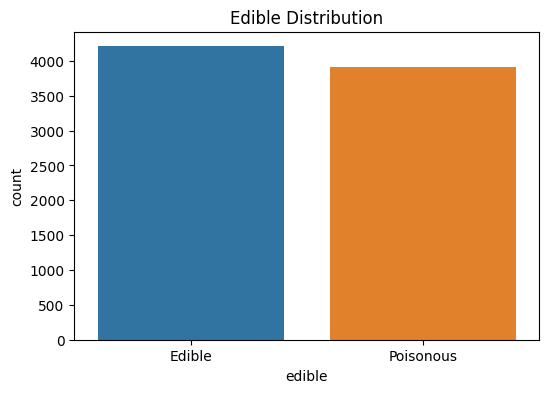

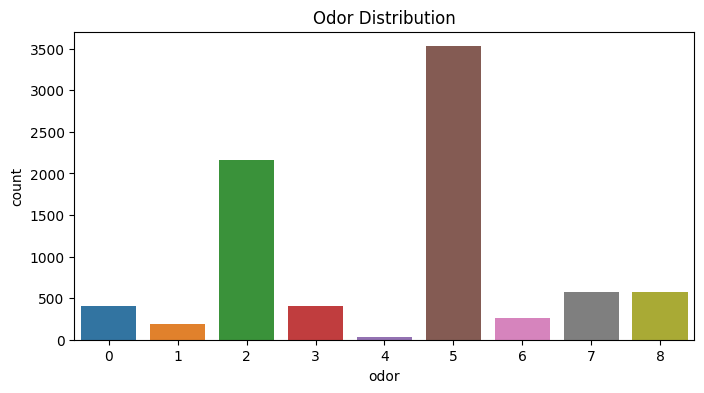

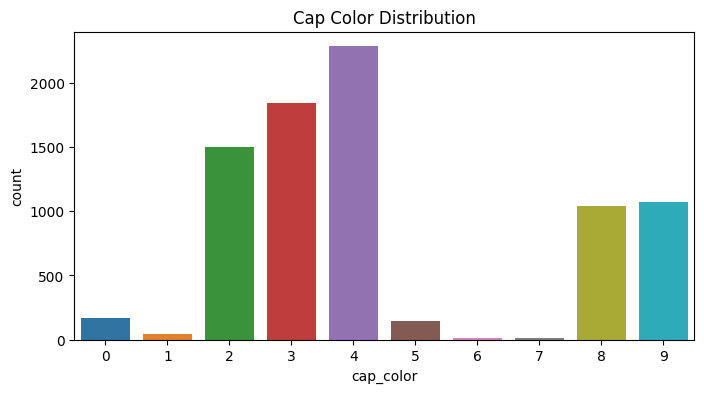

In [30]:
#Showing the distribution of data for each of the three columns

#Edible distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=smaller_encoded, x='edible')
plt.title('Edible Distribution')
plt.xticks([0, 1], ['Edible', 'Poisonous'])
plt.show()

#Odor distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=smaller_encoded, x='odor')
plt.title('Odor Distribution')
plt.show()

#Cap color distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=smaller_encoded, x='cap_color')
plt.title('Cap Color Distribution')
plt.show()

## Label Mappings
The label map for the dataset values is as following. It is a good idea to have such a map for future use.

| **edible**       | **odor**        | **cap_color**   |
|------------------|-----------------|-----------------|
| e (edible) → 0   | a (almond) → 0  | b (buff) → 0    |
| p (poisonous) → 1| c (creosote) → 1| c (cinnamon) → 1|
|                  | f (foul) → 2    | e (red) → 2     |
|                  | l (anise) → 3   | g (gray) → 3    |
|                  | m (musty) → 4   | n (brown) → 4   |
|                  | n (none) → 5    | p (pink) → 5    |
|                  | p (pungent) → 6 | r (green) → 6   |
|                  | s (spicy) → 7   | u (purple) → 7  |
|                  | y (fishy) → 8   | w (white) → 8   |
|                  |                 | y (yellow) → 9  |

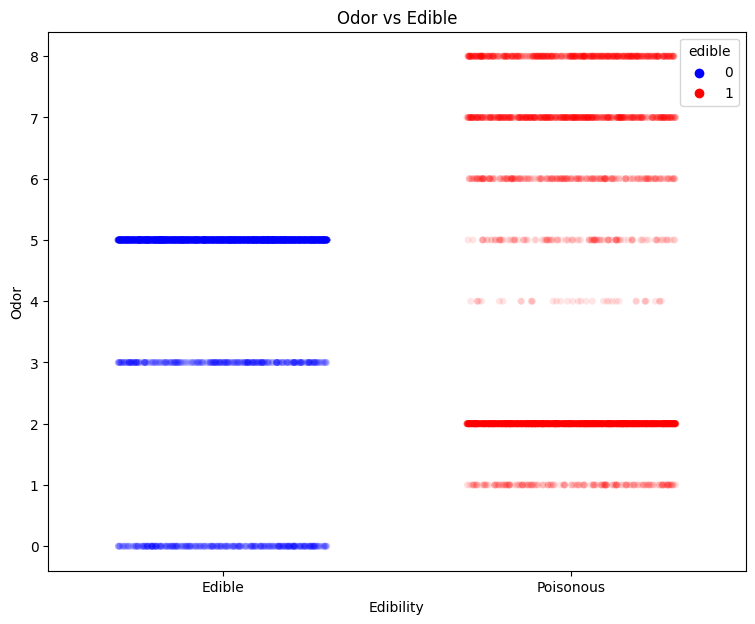

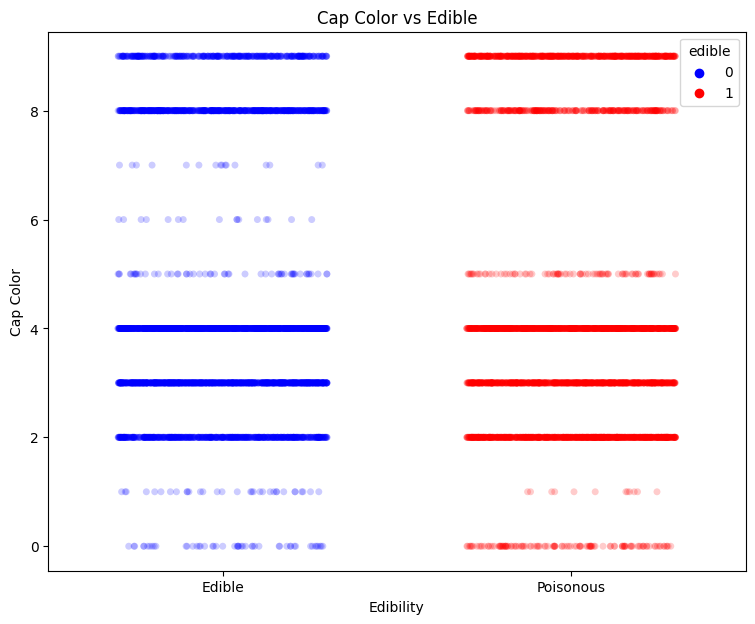

In [31]:
#Scatterplot on edible vs odor 
plt.figure(figsize=(9, 7))
sns.stripplot(data=smaller_encoded, x='edible', y='odor', jitter=0.3, alpha=0.1, hue='edible', palette={0: 'blue', 1: 'red'})

plt.title('Odor vs Edible')
plt.xticks([0, 1], ['Edible', 'Poisonous'])
plt.ylabel('Odor')
plt.xlabel('Edibility')
plt.show()

#Scatterplot on edible vs cap_color
plt.figure(figsize=(9, 7))
sns.stripplot(data=smaller_encoded, x='edible', y='cap_color', jitter=0.3, alpha=0.2, hue='edible', palette={0: 'blue', 1: 'red'})

plt.title('Cap Color vs Edible')
plt.xticks([0, 1], ['Edible', 'Poisonous'])
plt.ylabel('Cap Color')
plt.xlabel('Edibility')
plt.show()

## Conclusion

Based on the scatterplots, there is a strong relationship between the odor of a mushroom, and whether it is edible or poisonous. In this dataset, certain unpleasant odors, such as **creosote(1), foul(2), musty(4), pungent(6), spicy(7), and fishy(8)**, are exclusively associated with poisonous mushrooms.

The only attribute that stands out is that some poisonous mushrooms have no smell. Odor 5 (none) has a mix of edible and poisonous mushrooms, meaning "no smell" is less predictive. At the same time, there are essentially no poisonous mushrooms that smell pleasant (anise or almond).

The more pleasant or mild odors like **almond(0) and anise(3)** are typically linked to edible mushrooms. In this dataset, only the edible mushrooms smell like almond or anise, while most of them appear to have no smell. 

**This clear separation indicates that odor is a very strong predictor of edibility and would likely be very useful for building a predictive model.**

On the other hand, the second cap color scatterplot is much messier and does not show a clear separation. It reveals little correlation between the cap color and whether the mushroom is edible or not. In fact, the distributions appear almost identical on both sides. The scatterplot shows that cap colors such as **red(2), gray(3), brown(4), white(8), and yellow(9)** are found in both edible and poisonous mushrooms, with no clear pattern to be distinguished. 

**While cap color adds some information, it is not reliable enough on its own for prediction.**

The initial distribution plots help us understand how values are spread across the selected features. The edibility column shows an almost even split between edible and poisonous mushrooms, which is ideal for building balanced classification models. 

The odor column’s distribution shows that a few values, such as none, are very common, while others like musty or creosote occur less frequently. This tells us that some categories dominate the data, and we may need to consider that imbalance when evaluating model performance. This kind of uneven distribution might affect how a model learns from the data.

The cap color column shows a wider range of values that are more evenly spread compared to odor, indicating a more diverse attribute. 

These distributions don't tell us anything about relationships between features, but they do confirm that the dataset includes both dominant and diverse attributes, which makes it a good candidate for building and testing predictive classifier models.